# SBC_pollution_China data analysis

This notebook has been generated on 2020-04-19 11:39 

The objective of this notebook is to YYY

## Analysis steps

The analysis steps performed in this notebook are the following

- Lorem ipsum dolor sit amet
- Lorem ipsum dolor sit amet
- Lorem ipsum dolor sit amet

## Data source 

The data source of this dataset is:

- [TFP_SBC_firm](HERE)

### Variable name

The variables names and labels are the following:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Variables</th>
      <th>Labels</th>
      <th>Types</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>id</td>
      <td>id</td>
      <td>object</td>
    </tr>
    <tr>
      <th>1</th>
      <td>OWNERSHIP</td>
      <td>OWNERSHIP</td>
      <td>object</td>
    </tr>
    <tr>
      <th>2</th>
      <td>year</td>
      <td>year</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>3</th>
      <td>geocode4_corr</td>
      <td>geocode4_corr</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>4</th>
      <td>industry</td>
      <td>industry</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>5</th>
      <td>occurence</td>
      <td>occurence</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>6</th>
      <td>tfp_OP</td>
      <td>tfp_OP</td>
      <td>float64</td>
    </tr>
    <tr>
      <th>7</th>
      <td>tfp_OWNERSHIP</td>
      <td>tfp_OWNERSHIP</td>
      <td>float64</td>
    </tr>
    <tr>
      <th>8</th>
      <td>polluted_thre</td>
      <td>polluted_thre</td>
      <td>object</td>
    </tr>
    <tr>
      <th>9</th>
      <td>cityen</td>
      <td>cityen</td>
      <td>object</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Coastal</td>
      <td>Coastal</td>
      <td>bool</td>
    </tr>
    <tr>
      <th>11</th>
      <td>TCZ_c</td>
      <td>TCZ_c</td>
      <td>object</td>
    </tr>
    <tr>
      <th>12</th>
      <td>target_c</td>
      <td>target_c</td>
      <td>float64</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Period</td>
      <td>Period</td>
      <td>object</td>
    </tr>
    <tr>
      <th>14</th>
      <td>FE_c_i</td>
      <td>FE_c_i</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>15</th>
      <td>FE_t_i</td>
      <td>FE_t_i</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>16</th>
      <td>FE_t_c</td>
      <td>FE_t_c</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>17</th>
      <td>FE_c_i_o</td>
      <td>FE_c_i_o</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>18</th>
      <td>FE_t_o</td>
      <td>FE_t_o</td>
      <td>int64</td>
    </tr>
  </tbody>
</table>

# Analysis

## Load the data

It takes a will to upload the firm data, so we load it localy.

In [1]:
import pandas as pd
from Fast_connectCloud import connector
import plotly.express as px

In [2]:
import sys, os
sys.path.insert(0,'..')

In [3]:
import functions.latex_beautify as lb

%load_ext autoreload
%autoreload 2

In [4]:
options(warn=-1)
shhh <- suppressPackageStartupMessages
shhh(library(tidyverse))
shhh(library(lfe))
shhh(library(lazyeval))
shhh(library('progress'))

path = "../functions/SBC_pollution_R.R"
source(path)
path = "../functions/SBC_pollutiuon_golatex.R"
source(path)

In [5]:
gs = connector.open_connection(online_connection = False,
                              path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth')

service = gs.connect_remote('GCP')

Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0xa22e42750> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0xa1ccd25d0> and accessible with "bigquery_account"


In [6]:
%put df_final --to R
#from GoogleDrivePy.google_platform import connect_cloud_platform
#project = 'v'
#gcp = connect_cloud_platform.connect_console(project = project, 
#                                             service_account = service['GoogleCloudP'])    
#query = (
#          "SELECT * "
#            "FROM China.TFP_SBC_firm "

#        )

#df_final = gcp.upload_data_from_bigquery(query = query, location = 'US')
#df_final.head()
df_final = pd.read_csv('../01_TFP_SBC_firm.gz')    

/Users/thomas/anaconda3/lib/python3.7/site-packages/pyarrow/feather.py:83: FutureWarning:

The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [7]:
df_final <- df_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

# Table TFP

$$
TFP _{fi k t}=\alpha\left(\text { Period } \times \text { Target }_{i} \times \text { Polluting sectors }_{k} \right)+\nu_{i}+\lambda_{t}+\phi_{k}+\epsilon_{i k t}
$$

1. Full sample
2. SOE dominated
3. TCZ vs No TCZ
4. Coastal vs No Coastal
3. Kuznet threshold

## Test

For each category, proceed as follow:

1. Without Firm's FE

- Test 1
    - `target * polluted * period *ownership`
    - `target * polluted * period` FOR SOE
    - `target * polluted * period` FOR PRIVATE
    - FE: `cio + ct+ti+to` & `ci+ct+ti` 
- Test 2
    - Similar to test 1, but filter `TCZ/No TCZ`
- Test 3
    - `target * period *ownership`
    - `target * period` FOR SOE
    - `target * period` FOR PRIVATE
    - FE: `cio + to+tc` & `c+i+t`
- Test 4
    - Similar to test 3, but filter `TCZ/No TCZ`    

2. With Firm's FE

- Identical to `Without Firm's FE` but include `firm` fixed effect


In [ ]:
head(df_final)

### Without firm's fixed effect


In [8]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              FE_c_i_o + FE_t_c + FE_t_i +FE_t_o    
              | 0 |
             industry, data= df_to_filter,
             exactDOF=TRUE)

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'),
             exactDOF=TRUE)

fe1 <- list(
    c("City-industry-ownership", "Yes", "No", "No"),
    c("City-industry", "No", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes"),
    c("Industry-time", "Yes", "Yes", "Yes"),
    c("time-ownership", "Yes", "No", "No")
             )

name = paste0("table_",1,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

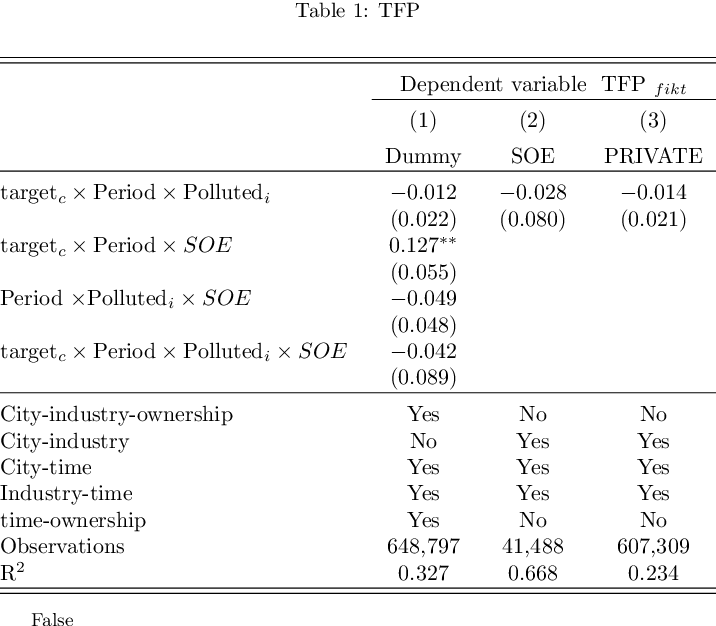

In [9]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

new_row = ['& Dummy', 'SOE', 'PRIVATE']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 1,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [10]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              FE_c_i_o + FE_t_c + FE_t_i +FE_t_o    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c == 'TCZ'),
             exactDOF=TRUE)
           
t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              FE_c_i_o + FE_t_c + FE_t_i +FE_t_o    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c != 'TCZ'),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ' & 
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)
           
t4 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'&
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)

t5 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)
           
t6 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)

fe1 <- list(
    c("City-industry-ownership", "Yes","Yes", "No", "No", "No", "No"),
    c("City-industry", "No","No", "Yes", "Yes", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry-time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("time-ownership", "Yes","Yes", "No", "No", "No", "No")
             )

name = paste0("table_",2,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3, t4, t5, t6)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

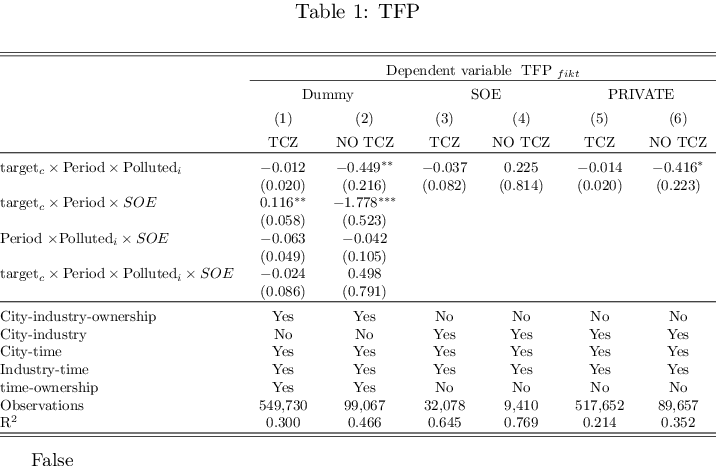

In [11]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = ['& TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 2,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

Remove `polluted sector` 

In [12]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * OWNERSHIP|
              FE_c_i_o + FE_t_o  + FE_t_c 
              | 0 |
             industry, data=df_to_filter)

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'))

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'))

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("City-industry-ownership", "Yes", "No", "No"),
    c("City-time", "Yes", "No", "No"),
    c("time-ownership", "Yes", "No", "No"),
    c("City", "No", "Yes", "Yes"),
    c("Industry", "No", "Yes", "Yes"),
    c("time", "No", "Yes", "Yes")
             )

name = paste0("table_",3,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

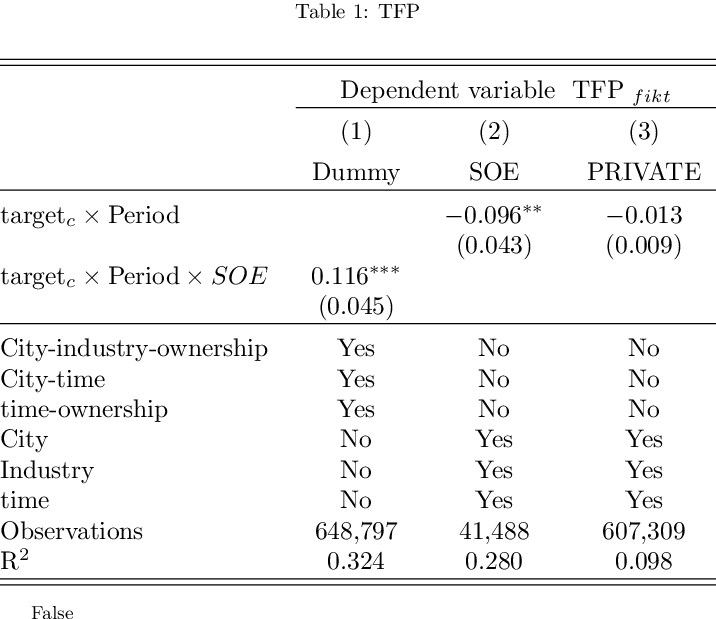

In [13]:
new_row = ['& Dummy', 'SOE', 'PRIVATE']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 3,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [14]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP|
              FE_c_i_o + FE_t_o  + FE_t_c    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c == 'TCZ'),
             exactDOF=TRUE)
           
t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP|
              FE_c_i_o + FE_t_o  + FE_t_c    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c != 'TCZ'),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ' & 
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)
           
t4 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'&
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)

t5 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)
           
t6 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
             cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("City-industry-ownership", "Yes", "Yes", "No", "No", "No", "No"),
    c("City-time", "Yes","Yes", "No", "No", "No", "No"),
    c("time-ownership", "Yes","Yes", "No", "No", "No", "No"),
    c("City", "No","No",  "Yes", "Yes",  "Yes", "Yes"),
    c("Industry", "No","No",  "Yes", "Yes",  "Yes", "Yes"),
    c("time", "No", "No", "Yes", "Yes",  "Yes", "Yes")
             )

name = paste0("table_",4,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3, t4, t5, t6)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

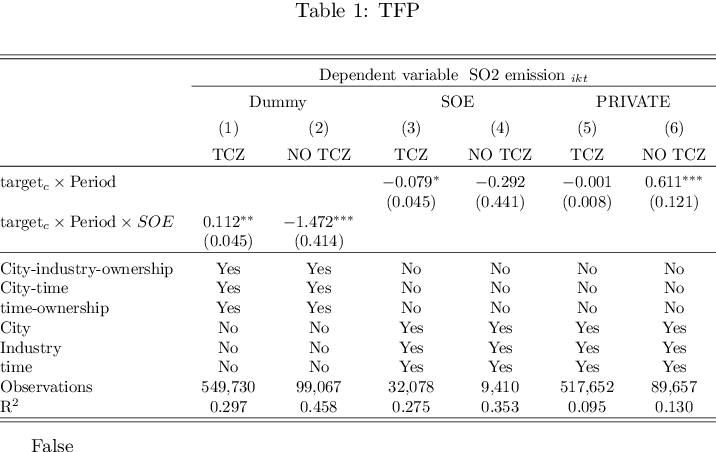

In [15]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = ['& TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 4,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

### With firm's fixed effect

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              id + FE_t_c + FE_t_i + FE_c_i     
              | 0 |
             industry, data= df_to_filter,
             exactDOF=TRUE)

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'),
             exactDOF=TRUE)

fe1 <- list(
    c("Firm", "Yes", "Yes", "Yes"),
    c("City-industry", "Yes", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes"),
    c("time-industry", "Yes", "Yes", "Yes")
             )

name = paste0("table_",5,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

new_row = ['& Dummy', 'SOE', 'PRIVATE']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 5,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              id + FE_t_c + FE_t_i + FE_c_i    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c == 'TCZ'),
             exactDOF=TRUE)
           
t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              id + FE_t_c + FE_t_i + FE_c_i    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c != 'TCZ'),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ' & 
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)
           
t4 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'&
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)

t5 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)
           
t6 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)

fe1 <- list(
    c("Firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("time-industry", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

name = paste0("table_",6,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3, t4, t5, t6)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = ['& TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 2,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * OWNERSHIP|
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data=df_to_filter)

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              id + cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'))

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              id+ cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'))

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("Firm", "Yes", "Yes", "Yes"),
    c("City-industry", "Yes", "No", "No"),
    c("City-time", "Yes", "No", "No"),
    c("time-industry", "Yes", "No", "No"),
    c("City", "No", "Yes", "Yes"),
    c("Industry", "No", "Yes", "Yes"),
    c("time", "No", "Yes", "Yes")
             )

name = paste0("table_",7,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
new_row = ['& Dummy', 'SOE', 'PRIVATE']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 7,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP|
              id + FE_t_c + FE_t_i + FE_c_i   
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c == 'TCZ'),
             exactDOF=TRUE)
           
t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP|
              id + FE_t_c + FE_t_i + FE_c_i    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c != 'TCZ'),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ' & 
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)
           
t4 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'&
                 OWNERSHIP == 'SOE'),
             exactDOF=TRUE)

t5 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)
           
t6 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
             id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'& 
                 OWNERSHIP != 'SOE'),
             exactDOF=TRUE)

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("Firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-industry", "Yes", "Yes", "No", "No", "No", "No"),
    c("City-time", "Yes", "Yes","No", "No", "No", "No"),
    c("time-industry", "Yes","Yes", "No", "No", "No", "No"),
    c("City", "No","No", "Yes", "Yes", "Yes", "Yes"),
    c("Industry", "No","No", "Yes", "Yes", "Yes", "Yes"),
    c("time", "No","No", "Yes", "Yes", "Yes", "Yes")
             )

name = paste0("table_",8,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3, t4, t5, t6)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = ['& TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 8,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)